<a href="https://colab.research.google.com/github/ChangHaoXiang/AI/blob/main/keras_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                    

In [2]:
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170508288/170498071 [==============================] - 3s 0us/step


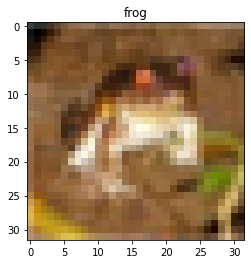

[6]


In [3]:
import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])

In [4]:
train_history=model.fit(train_data,train_label,epochs=30,batch_size=512)

Epoch 1/30
98/98 [==============================] - 567s 6s/step - loss: 17.8673 - accuracy: 0.1767
Epoch 2/30
98/98 [==============================] - 566s 6s/step - loss: 2.5247 - accuracy: 0.2044
Epoch 3/30
98/98 [==============================] - 566s 6s/step - loss: 2.0563 - accuracy: 0.3074
Epoch 4/30
98/98 [==============================] - 567s 6s/step - loss: 1.8679 - accuracy: 0.3639
Epoch 5/30
98/98 [==============================] - 566s 6s/step - loss: 1.7059 - accuracy: 0.4236
Epoch 6/30
98/98 [==============================] - 566s 6s/step - loss: 1.5776 - accuracy: 0.4689
Epoch 7/30
98/98 [==============================] - 566s 6s/step - loss: 1.3959 - accuracy: 0.5250
Epoch 8/30
98/98 [==============================] - 565s 6s/step - loss: 1.2389 - accuracy: 0.5761
Epoch 9/30
98/98 [==============================] - 565s 6s/step - loss: 1.0915 - accuracy: 0.6272
Epoch 10/30
98/98 [==============================] - 566s 6s/step - loss: 0.9726 - accuracy: 0.6689
Epoch 11

In [5]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 34s 109ms/step - loss: 4.2372 - accuracy: 0.5782
0.5781999826431274


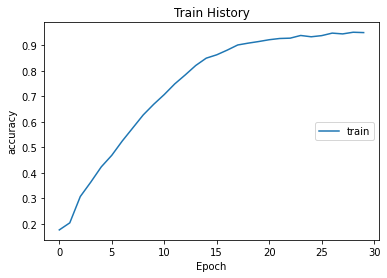

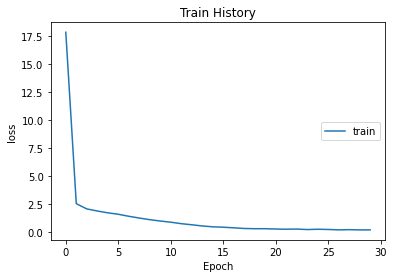

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')